In [1]:
# Import dependencies
import psycopg2
import requests
from requests import get
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sqlalchemy import create_engine


url = "https://asos2.p.rapidapi.com/v2/auto-complete" 

headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "asos2.p.rapidapi.com"
}


# EXTRACT

• ASOS EXTRACTION

In [2]:
# Function that takes a search term, store, and country as input retunrs the number of results for each searach term.

def autocomplete_viz(search_term, store, country):

    querystring = {"q": search_term, "store": store, "country": country}

    autocomplete_response = get(url, headers=headers, params=querystring).json()
    
    suggestions = autocomplete_response["suggestionGroups"][0]["suggestions"]
    
    search_terms, number_results = [], []
    for suggestion in suggestions:
        search_terms.append(suggestion["searchTerm"])
        number_results.append(suggestion["numberOfResults"])
    
    return sum(number_results)


In [3]:
# Executing defined function for each color/location/store combination.

us_pink = autocomplete_viz("pink", "US", "US")
us_blue = autocomplete_viz("blue", "US", "US")
us_green = autocomplete_viz("green", "US", "US")
us_black = autocomplete_viz("black", "US", "US")
us_white = autocomplete_viz("white", "US", "US")

fr_pink = autocomplete_viz("rose", "FR", "FR")
fr_blue = autocomplete_viz("bleu", "FR", "FR")
fr_green = autocomplete_viz("verte", "FR", "FR")
fr_black = autocomplete_viz("noir", "FR", "FR")
fr_white = autocomplete_viz("blanc", "FR", "FR")

es_pink = autocomplete_viz("rosa", "ES", "ES")
es_blue = autocomplete_viz("azul", "ES", "ES")
es_green = autocomplete_viz("verde", "ES", "ES")
es_black = autocomplete_viz("negro", "ES", "ES")
es_white = autocomplete_viz("blanco", "ES", "ES")

de_pink = autocomplete_viz("rosa", "DE", "DE")
de_blue = autocomplete_viz("blau", "DE", "DE")
de_green = autocomplete_viz("grun", "DE", "DE")
de_black = autocomplete_viz("schwarz", "DE", "DE")
de_white = autocomplete_viz("weiß", "DE", "DE")

it_pink = autocomplete_viz("rosa", "IT", "IT")
it_blue = autocomplete_viz("blu", "IT", "IT")
it_green = autocomplete_viz("verde", "IT", "IT")
it_black = autocomplete_viz("nero", "IT", "IT")
it_white = autocomplete_viz("bianco", "IT", "IT")

au_pink = autocomplete_viz("pink", "AU", "AU")
au_blue = autocomplete_viz("blue", "AU", "AU")
au_green = autocomplete_viz("green", "AU", "AU")
au_black = autocomplete_viz("black", "AU", "AU")
au_white = autocomplete_viz("white", "AU", "AU")

• MYNTRA EXTRACTION

In [4]:
# Preparing myntra csv to be read to dataframe.  

data_to_load = "Resources/myntra_products_catalog.csv"

# TRANSFORM

• ASOS TRANSFORM

In [5]:
# Generating asos dataframe indexed by color, where each column is a country queried. 
# Converting asos dataframe values to integers. 

asos_colors_grouped = pd.DataFrame({"Color": ["Pink", "Blue", "Green", "Black", "White"], "ASOS_US":[us_pink, us_blue, us_green, us_black, us_white], "ASOS_FR":[fr_pink, fr_blue, fr_green, fr_black, fr_white], "ASOS_ES":[es_pink, es_blue, es_green, es_black, es_white],"ASOS_DE":[de_pink, de_blue, de_green, de_black, de_white], "ASOS_IT":[it_pink, it_blue, it_green, it_black, it_white], "ASOS_AU": [au_pink, au_blue, au_green, au_black, au_white]}).set_index("Color")
asos_colors_grouped = asos_colors_grouped.astype(int)
asos_colors_grouped

,ASOS_US,ASOS_FR,ASOS_ES,ASOS_DE,ASOS_IT,ASOS_AU
Color,,,,,,
Pink,19329,24392,19523,11902,19915,15401
Blue,17452,13648,9136,15572,28381,21133
Green,19028,11249,9407,15206,15271,13941
Black,14088,16677,12621,3044,16374,14901
White,7722,11486,10987,931,7406,11244


In [6]:
# Calculating the sum for each country (the total number of searched across colors), for use in subsequent dataframe.
# Creating a dataframe, indexed by color, presenting the proportions of each country's search terms. 

us_total = asos_colors_grouped["ASOS_US"].sum()
fr_total = asos_colors_grouped["ASOS_FR"].sum()
es_total = asos_colors_grouped["ASOS_ES"].sum()
de_total = asos_colors_grouped["ASOS_DE"].sum()
it_total = asos_colors_grouped["ASOS_IT"].sum()
au_total = asos_colors_grouped["ASOS_AU"].sum()

asos_prop = pd.DataFrame({"ASOS_US_prop": (asos_colors_grouped["ASOS_US"]/us_total), "ASOS_FR_prop": (asos_colors_grouped["ASOS_FR"]/fr_total), "ASOS_ES_prop": (asos_colors_grouped["ASOS_ES"]/es_total), "ASOS_DE_prop": (asos_colors_grouped["ASOS_DE"]/de_total), "ASOS_IT_prop": (asos_colors_grouped["ASOS_IT"]/it_total), "ASOS_AU_prop": (asos_colors_grouped["ASOS_AU"]/au_total)})
asos_prop

,ASOS_US_prop,ASOS_FR_prop,ASOS_ES_prop,ASOS_DE_prop,ASOS_IT_prop,ASOS_AU_prop
Color,,,,,,
Pink,0.249024,0.314931,0.316552,0.255107,0.227999,0.201005
Blue,0.224842,0.176212,0.148134,0.333769,0.324922,0.275816
Green,0.245146,0.145238,0.152528,0.325924,0.174831,0.181950
Black,0.181502,0.215320,0.204641,0.065245,0.187459,0.194479
White,0.099486,0.148298,0.178146,0.019955,0.084788,0.146750


In [7]:
# Merging the number of search terms and proportion of search terms dataframes. 

asos_combined = pd.merge(asos_colors_grouped, asos_prop, on = "Color", how = "left")
asos_combined

,ASOS_US,ASOS_FR,ASOS_ES,ASOS_DE,ASOS_IT,ASOS_AU,ASOS_US_prop,ASOS_FR_prop,ASOS_ES_prop,ASOS_DE_prop,ASOS_IT_prop,ASOS_AU_prop
Color,,,,,,,,,,,,
Pink,19329,24392,19523,11902,19915,15401,0.249024,0.314931,0.316552,0.255107,0.227999,0.201005
Blue,17452,13648,9136,15572,28381,21133,0.224842,0.176212,0.148134,0.333769,0.324922,0.275816
Green,19028,11249,9407,15206,15271,13941,0.245146,0.145238,0.152528,0.325924,0.174831,0.181950
Black,14088,16677,12621,3044,16374,14901,0.181502,0.215320,0.204641,0.065245,0.187459,0.194479
White,7722,11486,10987,931,7406,11244,0.099486,0.148298,0.178146,0.019955,0.084788,0.146750


In [8]:
# Creating a series that combines the number of search terms for each color across countries. 
# Calaculating the total number of search terms across countries.
# Creating a dataframe, indexed by color, displaying the total number of search terms and the proportion of search terms across countries. 

asos_all_series = pd.Series(asos_colors_grouped["ASOS_US"] + asos_colors_grouped["ASOS_FR"] + asos_colors_grouped["ASOS_ES"] + asos_colors_grouped["ASOS_DE"] + asos_colors_grouped["ASOS_IT"] + asos_colors_grouped["ASOS_AU"])

asos_total = asos_all_series.sum()

asos_all_combined = pd.DataFrame({"ASOS_all": asos_all_series, "ASOS_all_prop":(asos_all_series/asos_total)})
asos_all_combined

,ASOS_all,ASOS_all_prop
Color,,
Pink,110462,0.258471
Blue,105322,0.246444
Green,84102,0.196791
Black,77705,0.181823
White,49776,0.116471


• MYNTRA TRANSFORM

In [9]:
# Reading myntra csv to dataframe. 
# Cleaning the myntra dataframe (correcting inconsistant string display and renaming column). 

myntra_data = pd.read_csv(data_to_load)

myntra_data["PrimaryColor"] = myntra_data["PrimaryColor"].replace({" Pink": "Pink", " Green": "Green", " Black": "Black", " White": "White"})
myntra_data = myntra_data.rename(columns = {"PrimaryColor": "Color"})
myntra_data

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,Color
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [10]:
# Creating a dataframe consisting of only the product id and colors of interest. 

myntra_interest = myntra_data[(myntra_data["Color"].isin(["Pink", "Blue", "Green", "Black", "White"]))]
myntra_interest = myntra_interest.loc[:,["ProductID","Color"]]

# Grouping the dataframe by color and converting entries to integers. 

myntra_colors_grouped = myntra_interest.groupby("Color")
myntra_colors_grouped = myntra_colors_grouped.count().astype(int)
myntra_colors_grouped = myntra_colors_grouped.rename(columns = {"ProductID": "myntra_IN"})
myntra_colors_grouped

,myntra_IN
Color,
Black,1640
Blue,3443
Green,908
Pink,391
White,880


In [11]:
# Calculating the total number of products across colors. 
# Creating a dataframe, indexed by color, consisting of the number and proportions of myntra products. 

myntra_total = myntra_colors_grouped["myntra_IN"].sum()

myntra_colors_combined = pd.DataFrame({"myntra_IN": myntra_colors_grouped["myntra_IN"], "myntra_IN_prop": (myntra_colors_grouped["myntra_IN"])/myntra_total })
myntra_colors_combined

,myntra_IN,myntra_IN_prop
Color,,
Black,1640,0.225833
Blue,3443,0.474112
Green,908,0.125034
Pink,391,0.053842
White,880,0.121179


# LOAD

In [14]:
# Loading tables of itnerest into pgAdmin by connecting the pandas dataframes with the postgresql tables using sqlalchemy. 
dialect_driver = "postgresql"
username = ""
password = ""
host = "localhost"
port = 5432
default_db = "fast_fashion"


engine = create_engine(f"{dialect_driver}://{username}:{password}@{host}:{port}/{default_db}")

asos_combined.to_sql("asos_combined", engine, if_exists='replace')
asos_all_combined.to_sql("asos_all_combined", engine, if_exists='replace')
myntra_colors_combined.to_sql("myntra_combined", engine, if_exists='replace')


5

# VISUALIZATION

• ASOS GRAPHS

(0.0, 35000.0)

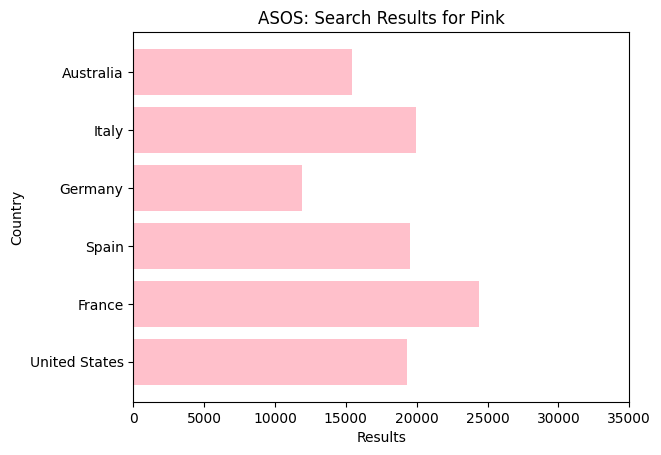

In [15]:
# Plotting the number of results per country for the trend color pink.

country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_pink, fr_pink, es_pink, de_pink, it_pink, au_pink]
plt.barh(country, results, color = "pink")
plt.title("ASOS: Search Results for Pink")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

(0.0, 35000.0)

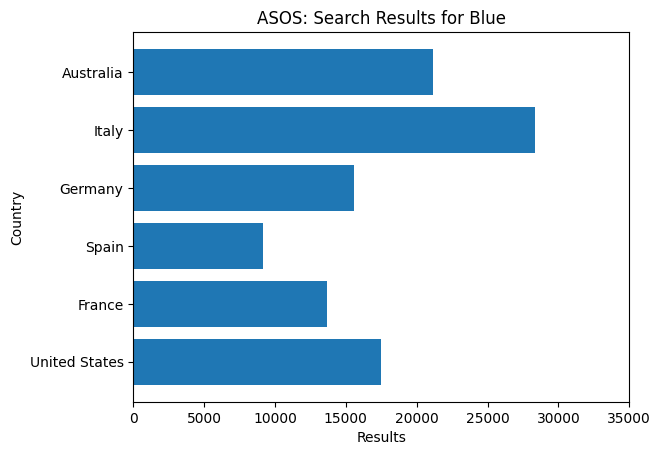

In [16]:
# Plotting the number of results per country for the trend color blue.

country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_blue, fr_blue, es_blue, de_blue, it_blue, au_blue]
plt.barh(country, results)
plt.title("ASOS: Search Results for Blue")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

(0.0, 35000.0)

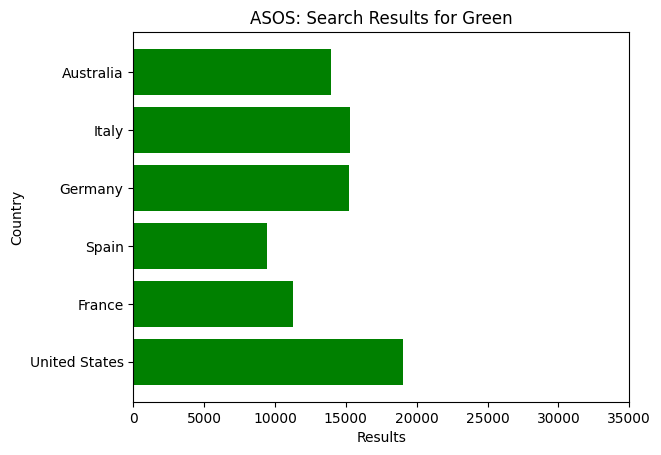

In [17]:
# Plotting the number of results per country for the trend color green.

country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_green, fr_green, es_green, de_green, it_green, au_green]
plt.barh(country, results, color = "g")
plt.title("ASOS: Search Results for Green")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

Text(0, 0.5, 'Number of Results')

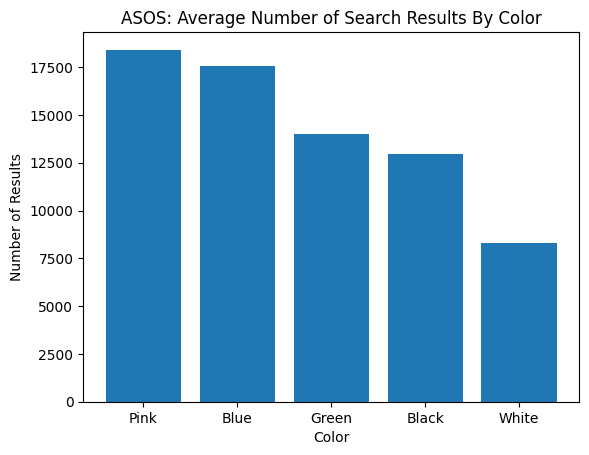

In [18]:
# Calculating the mean number of search results returned for each color across countries. 
# Plotting the average number of results for each color across countries. 

asos_mean_series = asos_all_series/6

colors = ["Pink", "Blue", "Green", "Black", "White"]
results = asos_mean_series
plt.bar(colors, results)
plt.title("ASOS: Average Number of Search Results By Color")
plt.xlabel("Color")
plt.ylabel("Number of Results")

• MYINTRA GRAPH

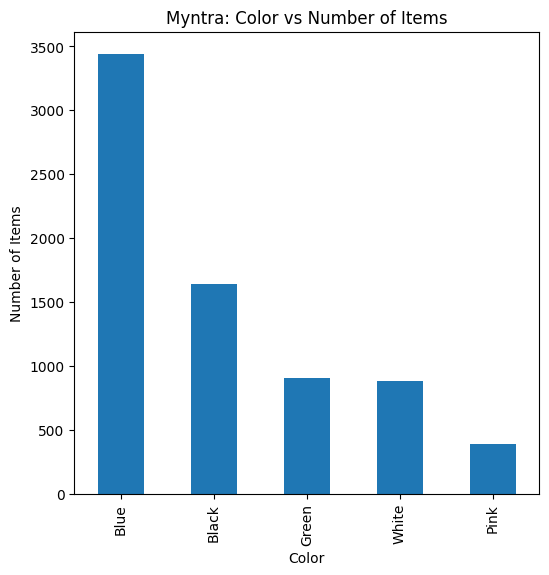

In [19]:
# Ploting the number of myntra catalog items for each color. 

myntra_color_sorted = myntra_colors_grouped.sort_values("myntra_IN", ascending = False)
myntra_color_graph = myntra_color_sorted.plot(kind="bar", y="myntra_IN", grid=False, figsize=(6,6), xlabel = "Color", ylabel = "Number of Items",title="Myntra: Color vs Number of Items", legend = False)

# ANALYSIS

• ASOS STATS

In [20]:
# Calculating Stats for each color in the asos dataframe.

asos_colors_agg = asos_colors_grouped.agg(["mean", "median", "var", "std", "sem"], axis = "columns")
asos_colors_agg

,mean,median,var,std,sem
Color,,,,,
Pink,18410.333333,19426.0,1.830816e+07,4278.804116,1746.814466
Blue,17553.666667,16512.0,4.401829e+07,6634.628209,2708.575624
Green,14017.000000,14573.5,1.140321e+07,3376.864167,1378.599023
Black,12950.833333,14494.5,2.579056e+07,5078.441155,2073.264920
White,8296.000000,9354.5,1.629462e+07,4036.659163,1647.959203


• MYINTRA STATS

In [21]:
# Get stats for each color in the myntra dataframe. 

myntra_colors_agg = myntra_colors_grouped.agg(["mean", "median"], axis = "columns")
myntra_colors_agg

,mean,median
Color,,
Black,1640.0,1640.0
Blue,3443.0,3443.0
Green,908.0,908.0
Pink,391.0,391.0
White,880.0,880.0


* CHI-SQUARED

In [22]:
# Creating a dataframe, indexed by color, that joing the asos color metrics across countries and the myntra color metrics.
# Created for use in chi-squared test. 

both_combined = asos_all_combined.join(myntra_colors_combined)
both_combined

,ASOS_all,ASOS_all_prop,myntra_IN,myntra_IN_prop
Color,,,,
Pink,110462,0.258471,391,0.053842
Blue,105322,0.246444,3443,0.474112
Green,84102,0.196791,908,0.125034
Black,77705,0.181823,1640,0.225833
White,49776,0.116471,880,0.121179


In [23]:
# Chi-squared test.

sig = st.chisquare(both_combined["ASOS_all"], f_exp=(both_combined["myntra_IN_prop"] * asos_total))
sig

Power_divergenceResult(statistic=400430.24556724256, pvalue=0.0)